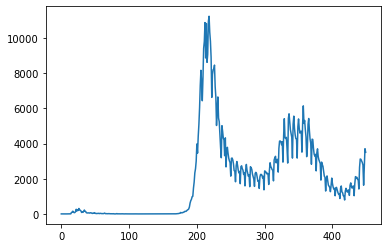

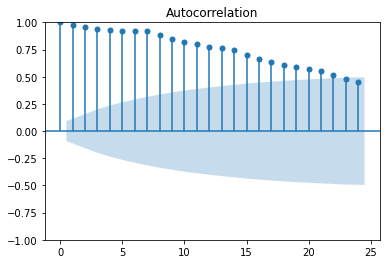

C:\Users\Todd\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


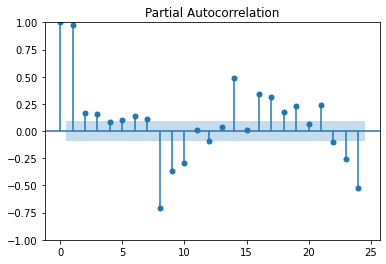

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'D:\專題\各縣市每日確診資料\台北市每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Taipei.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Taipei_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Taipei_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'D:\專題\各縣市每日確診資料\台北市每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        2
1        1
2        1
3        1
4        1
..     ...
446   1635
447   2734
448   3710
449   3508
450   2865

[451 rows x 1 columns]
451


# RNN架構

### Model1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_1 (Dense)             (None, 1, 1)              65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
41/41 [==============================] - 1s 9ms/step - loss: 0.0555 - mse: 0.0555 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4/10000
41/41 [============================

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 58/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 59/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 60/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 61/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 62/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 63/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 64/10000
41/41 [==============================] - 0s 2ms/step - loss: 0

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 119/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 120/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 121/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 122/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 123/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 124/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 125/10000
41/41 [==============================] - 0s 2ms/step - 

Epoch 179/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 180/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 181/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 182/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 183/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 184/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 185/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 186/10000
41/41 [==============================] 

Epoch 300/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 301/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 302/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 303/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 304/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 305/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 306/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 307/10000
41/41 [==============================] 

Epoch 421/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 422/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 423/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 424/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 425/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 426/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 427/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 428/10000
41/41 [==============================] 

Epoch 542/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 543/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 544/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 545/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 546/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 547/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 548/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 549/10000
41/41 [==============================] 

Epoch 663/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 664/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 665/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 666/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 667/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 668/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 669/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 670/10000
41/41 [==============================] 

Epoch 784/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 785/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0463 - mse: 0.0463 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 786/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 787/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 788/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 789/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 790/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 791/10000
41/41 [==============================] 

Epoch 905/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 906/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 907/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 908/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 909/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 910/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 911/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 912/10000
41/41 [==============================] 

41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1026/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1027/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1028/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1029/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1030/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1031/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1032/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1146/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1147/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1148/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1149/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1150/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1151/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1152/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1266/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1267/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1268/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1269/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1270/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1271/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1272/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0464 - mse: 0.0464 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1386/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1387/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1388/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1389/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1390/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1391/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1392/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1506/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1507/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1508/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1509/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1510/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1511/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1512/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 1ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1626/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1627/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1628/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1629/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1630/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1631/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1632/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 1746/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1747/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1748/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1749/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 1750/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1751/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1752/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1866/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1867/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1868/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1869/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1870/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1871/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1872/10000
41/41 [==============================] - 0s 1ms/

41/41 [==============================] - 0s 1ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1986/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1987/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1988/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1989/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1990/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 1991/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1992/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2106/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2107/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2108/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2109/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2110/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2111/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2112/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2226/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2227/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2228/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2229/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2230/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2231/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2232/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2346/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2347/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2348/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2349/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2350/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2351/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2352/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2466/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2467/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2468/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2469/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2470/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2471/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2472/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2586/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2587/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2588/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2589/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2590/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2591/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2592/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2706/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2707/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2708/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2709/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2710/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2711/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2712/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2826/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2827/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2828/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2829/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2830/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2831/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2832/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2946/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2947/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2948/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2949/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0465 - mse: 0.0465 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2950/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2951/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2952/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3066/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3067/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3068/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3069/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3070/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3071/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3072/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3186/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3187/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3188/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3189/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3190/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3191/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3192/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3306/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3307/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3308/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3309/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3310/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3311/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3312/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3426/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3427/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3428/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3429/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3430/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3431/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3432/10000
41/41 [==============================] - 0s 1ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3546/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3547/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3548/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3549/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3550/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3551/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3552/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3666/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3667/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3668/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3669/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3670/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3671/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3672/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3786/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3787/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3788/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3789/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3790/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3791/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3792/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3906/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3907/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3908/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3909/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3910/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3911/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 3912/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4026/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4027/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4028/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4029/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4030/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4031/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4032/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4146/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4147/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4148/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4149/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4150/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4151/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4152/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4266/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4267/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4268/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4269/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4270/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4271/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4272/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4386/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4387/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4388/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4389/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4390/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4391/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4392/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4506/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4507/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4508/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4509/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4510/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4511/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4512/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4626/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4627/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4628/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4629/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4630/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4631/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4632/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4746/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4747/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4748/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4749/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4750/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4751/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4752/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4866/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4867/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4868/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4869/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4870/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4871/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4872/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4986/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4987/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4988/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4989/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4990/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4991/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4992/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5106/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5107/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 5108/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 5109/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5110/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5111/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 5112/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5226/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5227/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5228/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 5229/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5230/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 5231/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5232/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5346/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5347/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 5348/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5349/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5350/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 5351/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5352/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 5466/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5467/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0465 - mse: 0.0465 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 5468/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 5469/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5470/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 5471/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 5472/10000
41/41 [==============================] - 0s 1ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 5586/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5587/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5588/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 5589/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 5590/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5591/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5592/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5706/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5707/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5708/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5709/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 5710/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5711/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5712/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5826/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 5827/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 5828/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 5829/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5830/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5831/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 5832/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5946/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5947/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5948/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5949/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5950/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 5951/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 5952/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 6066/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6067/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6068/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6069/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6070/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6071/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 6072/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6186/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6187/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6188/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6189/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6190/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6191/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6192/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6306/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6307/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6308/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 6309/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6310/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6311/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6312/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 6426/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0465 - mse: 0.0465 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6427/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6428/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6429/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6430/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6431/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6432/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6546/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6547/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6548/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 6549/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6550/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6551/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6552/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6666/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6667/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6668/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6669/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 6670/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6671/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6672/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6786/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6787/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6788/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 6789/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6790/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6791/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6792/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6906/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0464 - mse: 0.0464 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 6907/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6908/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6909/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6910/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 6911/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6912/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7026/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7027/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7028/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7029/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7030/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7031/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7032/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7146/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7147/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7148/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0464 - mse: 0.0464 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7149/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7150/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7151/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7152/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7266/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7267/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7268/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7269/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7270/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7271/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7272/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7386/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7387/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7388/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 7389/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7390/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7391/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7392/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7506/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7507/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 7508/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7509/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7510/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7511/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7512/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7626/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7627/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7628/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7629/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7630/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 7631/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 7632/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7746/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7747/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7748/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7749/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7750/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 7751/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7752/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 7866/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7867/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7868/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7869/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7870/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 7871/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7872/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7986/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7987/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7988/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7989/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 7990/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 7991/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7992/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8106/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8107/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8108/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8109/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8110/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 8111/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8112/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8226/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 8227/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 8228/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 8229/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 8230/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8231/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 8232/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 8346/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8347/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8348/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8349/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8350/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8351/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 8352/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8466/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 8467/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8468/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8469/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8470/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8471/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8472/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8586/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8587/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 8588/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8589/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 8590/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8591/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8592/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8706/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8707/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8708/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 8709/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 8710/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8711/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8712/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8826/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8827/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8828/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 8829/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8830/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 8831/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8832/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8946/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8947/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8948/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8949/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8950/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 8951/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8952/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9066/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9067/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9068/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9069/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9070/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9071/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 9072/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9186/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9187/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 9188/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9189/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9190/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9191/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9192/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9306/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9307/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9308/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9309/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9310/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9311/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9312/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9426/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9427/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 9428/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9429/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9430/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9431/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9432/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9546/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9547/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 9548/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9549/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9550/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9551/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0464 - mse: 0.0464 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9552/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9666/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9667/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9668/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9669/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9670/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9671/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 9672/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9786/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9787/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9788/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9789/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9790/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9791/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9792/10000
41/41 [==============================] - 0s 2ms/

41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9906/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9907/10000
41/41 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9908/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9909/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9910/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9911/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 9912/10000
41/41 [==============================] - 0s 2ms/

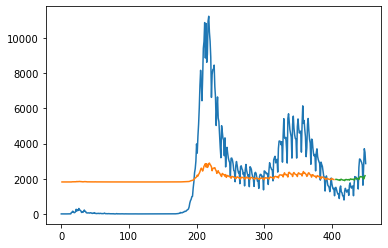

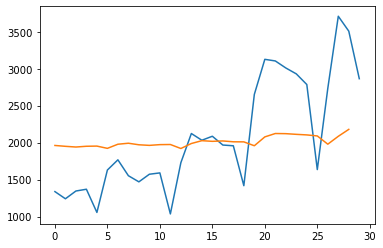

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(1, activation='sigmoid')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="taipei_gru_lstm.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=10000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('taipei.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('Taipei_plot.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("taipei_predict&real.png")
plt.show()

### Model2

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 dense_2 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
41/41 [==============================] - 1s 6ms/step - loss: 0.1453 - mse: 0.1453 - val_loss: 0.1016 - val_mse: 0.1016
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1204 - mse: 0.1204 - val_loss: 0.0775 - val_mse: 0.0775
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1010 - mse: 0.1010 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 4/100
41/41 [==============================] - 

Epoch 58/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 59/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 60/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 61/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 62/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 63/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 64/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 65/100
41/41 [==============================] - 0s 2ms/step - loss: 0.

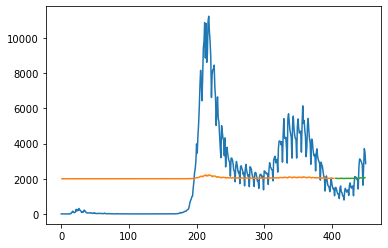

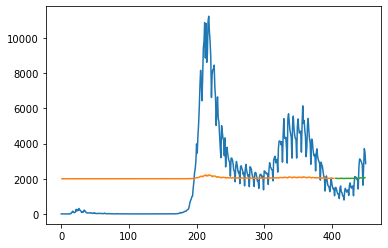

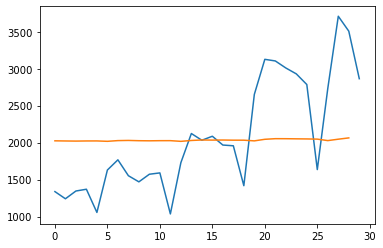

In [5]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    Dense(1, activation='sigmoid')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="taipei_gru_lstm.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=100, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('taipei.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('Taipei_plot.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("taipei_predict&real.png")
plt.show()

### Model3

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
41/41 [==============================] - 1s 8ms/step - loss: 0.1404 - mse: 0.1404 - val_loss: 0.0975 - val_mse: 0.0975
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1163 - mse: 0.1163 - val_loss: 0.0738 - val_mse: 0.0738
Epoch 3/100
41/41 [==============================] -

Epoch 57/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 58/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 59/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 60/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 61/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 62/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 63/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 64/100
41/41 [==============================] - 0s 2ms/step - loss: 0.

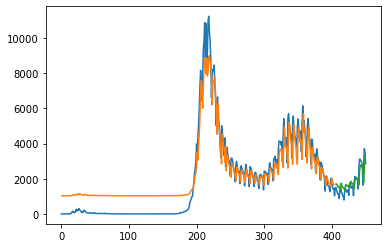

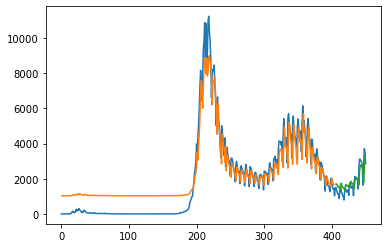

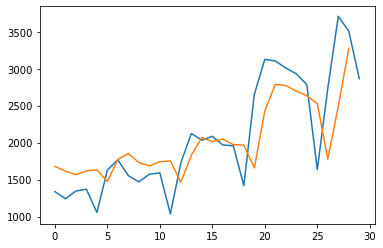

In [7]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="taipei_gru_lstm.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=100, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('taipei.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('Taipei_plot.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("taipei_predict&real.png")
plt.show()

### Model4

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_5 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 64)                4416      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,965
Trainable params: 8,965
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
41/41 [==============================] - 2s 8ms/step - loss: 0.1366 - mse: 0.1366 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 2/100
41/41 [==============================] - 

Epoch 56/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 57/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 58/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 59/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 60/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 61/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 62/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 63/100
41/41 [==============================] - 0s 2ms/step - loss: 0.

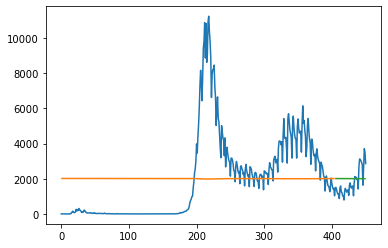

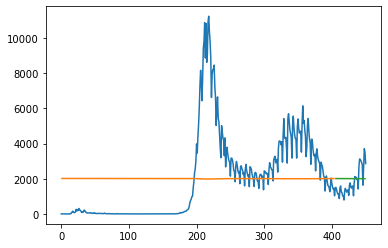

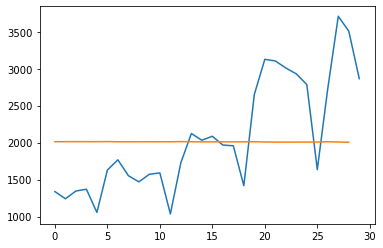

In [8]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='relu'),
    SimpleRNN(64, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="taipei_gru_lstm.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=100, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('taipei.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('Taipei_plot.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("taipei_predict&real.png")
plt.show()